# Basic analysis for initial data #
### Here we will investigate our initial data and try to save the columns that we need ###

In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv('../data/raw/netflix_reviews.csv')

In [3]:
# Basic analysis for initial data 
display(data.describe())
display(data.head())


,score,thumbsUpCount
count,113068.000000,113068.000000
mean,2.812140,10.483833
std,1.699847,101.252663
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,efd00499-5e00-49b5-9f32-bc7177ac5ca6,Mikel Magnusson,Netfix Canada forced my wife into a screen tha...,1,0,8.93.1 build 4 50540,2024-06-14 21:47:49,8.93.1 build 4 50540
1,be0d97e1-7de1-4f07-b493-35a53098b5a4,John McDevitt,I use this app until it asks if I'm still ther...,2,0,8.119.0 build 11 50706,2024-06-14 21:33:01,8.119.0 build 11 50706
2,8970dbcd-d75f-4016-bb93-efa5de3ef9e6,Mayur Savaliya,Boycott Netflix from Bharat,1,1,8.14.0 build 5 40129,2024-06-14 21:31:07,8.14.0 build 5 40129
3,a288bc3c-8a90-42d3-b585-1c8078faa96c,Magdalena Glessing,Little good movies and a lot of wonderful TV s...,5,0,8.118.1 build 10 50703,2024-06-14 21:27:26,8.118.1 build 10 50703
4,c388a806-0795-4812-b04e-5b2cdf327157,Elizabeth Turner,"New to this but, so far smooth sailing.app is ...",5,0,8.118.1 build 10 50703,2024-06-14 21:22:13,8.118.1 build 10 50703


In [4]:
# Take only necessary columns
data = data[["content", "score"]]


In [5]:
# Little more analysis
display(data.head())
print(f"The shape of our dataset is {data.shape}")


,content,score
0,Netfix Canada forced my wife into a screen tha...,1
1,I use this app until it asks if I'm still ther...,2
2,Boycott Netflix from Bharat,1
3,Little good movies and a lot of wonderful TV s...,5
4,"New to this but, so far smooth sailing.app is ...",5


The shape of our dataset is (113068, 2)


In [6]:
# Check for missing values
data.isnull().sum()


content    2
score      0
dtype: int64

In [7]:
# Remove missing rows, because they are only two
data = data.dropna()
data.shape

(113066, 2)

In [8]:
#Check again for missing values, to be sure that we don't have any
data.isnull().sum() 

content    0
score      0
dtype: int64

In [9]:
# Check the data types
data.dtypes

content    object
score       int64
dtype: object

In [10]:
# To solve binary classification problem, lets keep only reviews with score <=2 and >=4
# As we can see we have lost about 10000 samples, but simplified our problem
data = data[(data['score'] == 1) | (data['score'] == 5)]
data.shape

(76519, 2)

In [11]:
# Also we will merge score 1  into one class "negative" and score  5 into another class "positive"
# Negative class will be 0 and positive class will be 1
data['sentiment'] = data['score'].apply(lambda x: 0 if x == 1 else 1)
data = data.drop('score', axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21260\1167347548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


Text(0.5, 0, 'Review Score')

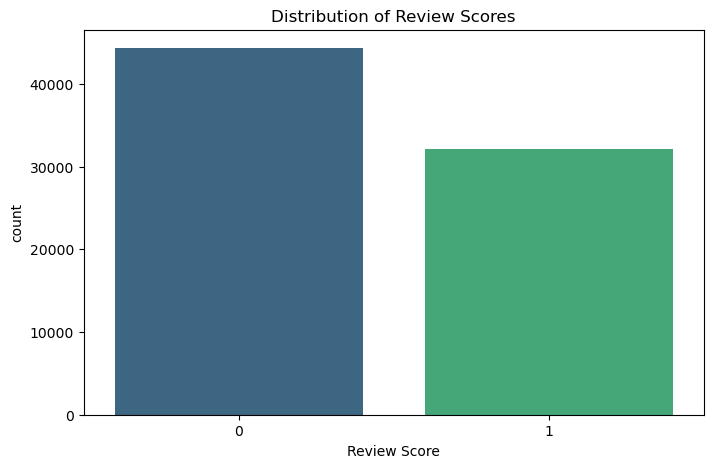

In [12]:
# As we don't have any problems with data types, we can try to make one simple visualization of score distribution
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')

## Conclusion ##
### We solved several problems, at first we are more confident about sentiment, we have not too imbalanced dataset, we will solve binary problem  ###

In [13]:
# The last thing we will do is splitting and saving our data 
X = data['content']
y = data['sentiment']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
train_data = pd.DataFrame({'content': X_train, 'sentiment': y_train})
test_data = pd.DataFrame({'content': X_test, 'sentiment': y_test})
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)


In [14]:
# One thing that we need to know and which will help us to choose right hyperparameters is how long are the reviews on average
data['content_length'] = data['content'].apply(len)
average_length = data['content_length'].mean()
print(f"The average length of the reviews is {average_length} characters.")

The average length of the reviews is 150.49934003319436 characters.


In [15]:
data = data[data["content_length"]<150]
data.shape

(49373, 3)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21260\871510136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


Text(0.5, 0, 'Review Score')

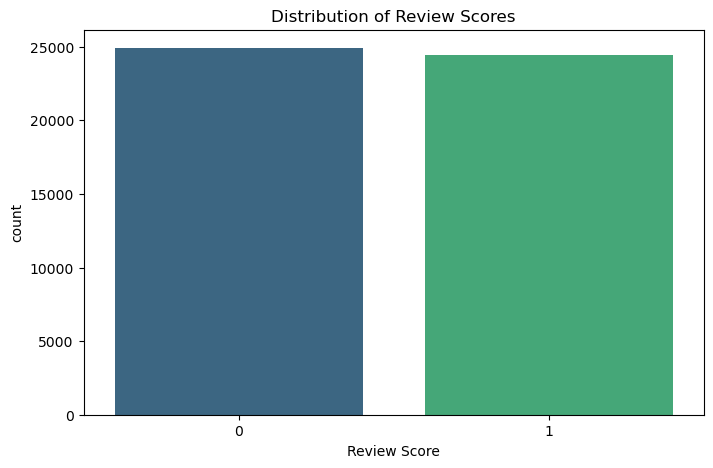

In [16]:
# Also check the distribution of this 

plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')